In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

In [4]:
!kaggle datasets download -d avinash741221/traffic-violations

 65% 2.00M/3.06M [00:01<00:00, 2.15MB/s]
100% 3.06M/3.06M [00:01<00:00, 2.65MB/s]


In [5]:
!unzip /content/traffic-violations.zip

Archive:  /content/traffic-violations.zip
  inflating: Bike Dataset/No Violations/download (15).jpeg  
  inflating: Bike Dataset/No Violations/download.jpeg  
  inflating: Bike Dataset/No Violations/images (1).jpeg  
  inflating: Bike Dataset/No Violations/images (10).jpeg  
  inflating: Bike Dataset/No Violations/images (2).jpeg  
  inflating: Bike Dataset/No Violations/images (3).jpeg  
  inflating: Bike Dataset/No Violations/images (4).jpeg  
  inflating: Bike Dataset/No Violations/images (5).jpeg  
  inflating: Bike Dataset/No Violations/images (6).jpeg  
  inflating: Bike Dataset/No Violations/images (7).jpeg  
  inflating: Bike Dataset/No Violations/images (8).jpeg  
  inflating: Bike Dataset/No Violations/images (9).jpeg  
  inflating: Bike Dataset/No Violations/images.jpeg  
  inflating: Bike Dataset/No helmet/download (1).jpeg  
  inflating: Bike Dataset/No helmet/download (10).jpeg  
  inflating: Bike Dataset/No helmet/download (11).jpeg  
  inflating: Bike Dataset/No helmet/

In [6]:
!mkdir Bikers

In [7]:
!mkdir -p /content/Bikers/No_Helmet
!mkdir -p /content/Bikers/No_Violations
!mkdir -p /content/Bikers/Triple_Riders
!mkdir -p /content/Bikers/Phone_Usage

In [8]:
!cp /content/Bike_Dataset/No_helmet/*.jpg  /content/Bikers/No_Helmet
!cp /content/Bike_Dataset/No_helmet/*.jpeg  /content/Bikers/No_Helmet


!cp /content/Bike_Dataset/No_Violations/*.jpeg /content/Bikers/No_Violations

!cp /content/Bike_Dataset/With_Helmet/*.jpg /content/Bikers/No_Violations

!cp /content/Bike_Dataset/Triple_Riders/*.jpeg /content/Bikers/Triple_Riders

!cp /content/Bike_Dataset/Phone_Usage/*.jpeg /content/Bikers/Phone_Usage

In [9]:
import os
dataset_dir = "/content/Bikers"
categories = ["No_Helmet", "No_Violations","Triple_Riders","Phone_Usage"]
image_counts = {}

for category in categories:
    category_path = os.path.join(dataset_dir, category)
    image_counts[category] = len(os.listdir(category_path))

print(image_counts)

{'No_Helmet': 44, 'No_Violations': 53, 'Triple_Riders': 40, 'Phone_Usage': 33}


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

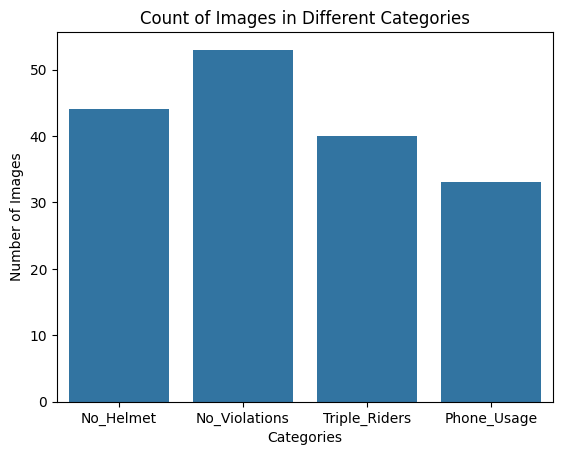

In [11]:
sns.barplot(x=list(image_counts.keys()), y=list(image_counts.values()))

plt.xlabel("Categories")
plt.ylabel("Number of Images")
plt.title("Count of Images in Different Categories")
plt.show()

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_path="/content/Bikers"
# test_path='/content/dataset/Testing'

In [13]:
train_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.1,shear_range=0.2,validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255,zoom_range=0.1,shear_range=0.2,validation_split=0.2)

# Processing the iamges available in train subset


In [15]:
train=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=16,subset='training',class_mode='categorical')# input pixels of images trained for VGGnet
test=test_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=16,subset='validation',class_mode='categorical')

Found 138 images belonging to 4 classes.
Found 32 images belonging to 4 classes.


#VGG-16 model

In [16]:
from tensorflow.keras.applications.vgg16 import VGG16 #Vgg 1000 class classifier trained with Imagenet datset
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model

In [17]:
vgg = VGG16(include_top=False,input_shape=(224,224,3))#trained input layer is removed

58889256/58889256 [==============================] - 3s 0us/step


# Check the model architecture(layers)

In [18]:
for layer in vgg.layers:
  print(layer)

# Not building the model using the pre-built one

In [19]:
for layer in vgg.layers:
  layer.trainable= False

In [20]:
x= Flatten()(vgg.output) #vectorizing the output from vgg 16

In [21]:
output=Dense(4,activation='softmax')(x) #fixing the output layer

# Model definition

In [22]:
vgg16= Model(vgg.input,output)

In [23]:
vgg16.compile(loss='categorical_crossentropy',optimizer='adam',metrics=(['accuracy']))

In [24]:
vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [87]:
vgg16.fit(train,validation_data=test,epochs=10)

Epoch 1/10
9/9 [==============================] - 3s 353ms/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 1.5981 - val_accuracy: 0.4375
Epoch 2/10
9/9 [==============================] - 3s 391ms/step - loss: 0.0502 - accuracy: 0.9855 - val_loss: 1.6454 - val_accuracy: 0.4375
Epoch 3/10
9/9 [==============================] - 2s 269ms/step - loss: 0.0967 - accuracy: 0.9783 - val_loss: 1.5796 - val_accuracy: 0.4688
Epoch 4/10
9/9 [==============================] - 2s 275ms/step - loss: 0.0651 - accuracy: 0.9783 - val_loss: 1.5066 - val_accuracy: 0.4688
Epoch 5/10
9/9 [==============================] - 2s 277ms/step - loss: 0.0899 - accuracy: 0.9855 - val_loss: 1.4774 - val_accuracy: 0.4375
Epoch 6/10
9/9 [==============================] - 4s 453ms/step - loss: 0.0745 - accuracy: 0.9928 - val_loss: 1.7877 - val_accuracy: 0.5000
Epoch 7/10
9/9 [==============================] - 3s 279ms/step - loss: 0.0785 - accuracy: 0.9928 - val_loss: 1.5912 - val_accuracy: 0.5000
Epoch 8/10
9/9 [====

# ResNet50

In [26]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model


In [27]:
res = ResNet50(include_top=False,input_shape=(224,224,3))#trained input layer is removed

94765736/94765736 [==============================] - 5s 0us/step


In [28]:
c=0
for layer in res.layers:
  c+=1
  print(layer)
print(c)
len(res.layers)

175


175

In [29]:
for layer in res.layers:
  layer.trainable=False

In [30]:
x = Flatten()(res.output)

In [31]:
output= Dense(4,activation='softmax')(x)

In [32]:
res_model =Model(res.input,output)

In [33]:
res_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=(['accuracy']))

In [34]:
res_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [35]:
res_model.fit(train,validation_data=test,epochs=10,steps_per_epoch=len(train),validation_steps=len(test))

Epoch 1/10
9/9 [==============================] - 10s 537ms/step - loss: 8.7774 - accuracy: 0.2246 - val_loss: 5.9673 - val_accuracy: 0.3125
Epoch 2/10
9/9 [==============================] - 2s 274ms/step - loss: 4.2556 - accuracy: 0.2899 - val_loss: 3.0490 - val_accuracy: 0.2500
Epoch 3/10
9/9 [==============================] - 2s 270ms/step - loss: 2.2787 - accuracy: 0.3768 - val_loss: 2.6200 - val_accuracy: 0.4688
Epoch 4/10
9/9 [==============================] - 3s 394ms/step - loss: 2.2553 - accuracy: 0.4565 - val_loss: 2.4191 - val_accuracy: 0.4062
Epoch 5/10
9/9 [==============================] - 3s 293ms/step - loss: 2.0692 - accuracy: 0.4565 - val_loss: 2.5720 - val_accuracy: 0.1875
Epoch 6/10
9/9 [==============================] - 2s 260ms/step - loss: 0.9448 - accuracy: 0.6014 - val_loss: 1.3292 - val_accuracy: 0.4688
Epoch 7/10
9/9 [==============================] - 3s 280ms/step - loss: 1.0157 - accuracy: 0.6014 - val_loss: 1.8216 - val_accuracy: 0.3438
Epoch 8/10
9/9 [===

# Inception model

In [36]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [37]:
incep= InceptionV3(include_top=False,input_shape=(299,299,3))

87910968/87910968 [==============================] - 5s 0us/step


In [38]:
for layer in incep.layers:
  print(layer)

In [39]:
len(incep.layers)

311

In [40]:
for layer in incep.layers:
  layer.trainable=False

In [41]:
x = Flatten()(incep.output)
output=Dense(4,activation='softmax')(x)

In [42]:
inc_model=Model(incep.input,output)

In [43]:
inc_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=(['accuracy']))

In [44]:
inc_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 149, 149, 32)         864       ['input_3[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 149, 149, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 149, 149, 32)         0         ['batch_normalization[0]

In [45]:
train_1=train_datagen.flow_from_directory(train_path,target_size=(299,299),batch_size=16,subset='training',class_mode='categorical')# input pixels of images trained for VGGnet
test_1=test_datagen.flow_from_directory(train_path,target_size=(299,299),batch_size=16,subset='validation',class_mode='categorical')

Found 138 images belonging to 4 classes.
Found 32 images belonging to 4 classes.


In [46]:
inc_model.fit(train_1,validation_data=test_1,epochs=5,steps_per_epoch=len(train_1),validation_steps=len(test_1))

Epoch 1/5
9/9 [==============================] - 15s 861ms/step - loss: 11.7654 - accuracy: 0.3986 - val_loss: 7.7695 - val_accuracy: 0.5312
Epoch 2/5
9/9 [==============================] - 5s 552ms/step - loss: 3.4157 - accuracy: 0.7246 - val_loss: 6.7597 - val_accuracy: 0.5938
Epoch 3/5
9/9 [==============================] - 4s 425ms/step - loss: 1.4327 - accuracy: 0.8841 - val_loss: 9.3171 - val_accuracy: 0.5938
Epoch 4/5
9/9 [==============================] - 5s 539ms/step - loss: 0.5421 - accuracy: 0.9348 - val_loss: 7.3769 - val_accuracy: 0.5312
Epoch 5/5
9/9 [==============================] - 5s 541ms/step - loss: 0.2641 - accuracy: 0.9783 - val_loss: 6.0144 - val_accuracy: 0.5938


# Exception Model

In [47]:
from tensorflow.keras.applications import Xception

In [48]:
xcep=Xception(include_top=False,input_shape=(299,299,3))

83683744/83683744 [==============================] - 5s 0us/step


In [49]:
for layer in res.layers:

  print(layer)

len(xcep.layers)

132

In [50]:
for layer in xcep.layers:
  layer.trainable=False


In [51]:
x=Flatten()(xcep.output)
output=Dense(4,activation='softmax')(x)

In [52]:
xcep_model=Model(xcep.input,output)

In [53]:
xcep_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=(['accuracy']))

In [54]:
xcep_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 149, 149, 32)         864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 149, 149, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 149, 149, 32)         0         ['block1_conv1_bn[0][0]'

In [61]:
xcep_model.fit(train_1,validation_data=test_1,epochs=5,steps_per_epoch=len(train_1),validation_steps=len(test_1))

Epoch 1/5
9/9 [==============================] - 4s 463ms/step - loss: 0.0988 - accuracy: 0.9783 - val_loss: 6.3891 - val_accuracy: 0.4688
Epoch 2/5
9/9 [==============================] - 5s 542ms/step - loss: 0.0945 - accuracy: 0.9855 - val_loss: 6.8057 - val_accuracy: 0.6562
Epoch 3/5
9/9 [==============================] - 4s 416ms/step - loss: 0.3523 - accuracy: 0.9710 - val_loss: 7.4168 - val_accuracy: 0.6250
Epoch 4/5
9/9 [==============================] - 4s 423ms/step - loss: 0.0630 - accuracy: 0.9928 - val_loss: 7.1436 - val_accuracy: 0.5938
Epoch 5/5
9/9 [==============================] - 4s 432ms/step - loss: 0.2931 - accuracy: 0.9855 - val_loss: 8.0815 - val_accuracy: 0.5938


## Stacked Model


In [72]:
from keras.layers import Input
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D, Flatten,Conv2D, Dense,BatchNormalization,GlobalAveragePooling2D,Dropout
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [68]:

input_shape = (224,224,3)
input_layer = Input(shape = (224, 224, 3))
mobilenet_base = MobileNetV2(weights = 'imagenet',input_shape = input_shape,include_top = False)
densenet_base = DenseNet169(weights = 'imagenet', input_shape = input_shape,include_top = False)

51877672/51877672 [==============================] - 3s 0us/step


In [69]:
for layer in mobilenet_base.layers:
    layer.trainable =  False
for layer in densenet_base.layers:
    layer.trainable = False

In [70]:
model_mobilenet = mobilenet_base(input_layer)
model_mobilenet = GlobalAveragePooling2D()(model_mobilenet)
output_mobilenet = Flatten()(model_mobilenet)

In [73]:
model_densenet = densenet_base(input_layer)
model_densenet = GlobalAveragePooling2D()(model_densenet)
output_densenet = Flatten()(model_densenet)

merged = tf.keras.layers.Concatenate()([output_mobilenet, output_densenet])

x = BatchNormalization()(merged)
x = Dense(256,activation = 'relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(128,activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation = 'softmax')(x)
stacked_model = tf.keras.models.Model(inputs = input_layer, outputs = x)

In [74]:
optm = Adam(lr=0.0001)
stacked_model.compile(loss='categorical_crossentropy', optimizer=optm,
                  metrics=['accuracy'])
stacked_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)           2257984   ['input_5[0][0]']             
 tional)                                                                                          
                                                                                                  
 densenet169 (Functional)    (None, 7, 7, 1664)           1264288   ['input_5[0][0]']             
                                                          0                                       
                                                                                            

In [ ]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
EarlyStopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=.01,
                              patience=6,
                              verbose=1,
                              mode='auto',
                              baseline=None,
                              restore_best_weights=True)

In [80]:
epochs = 20
batch_size  = 16
stacked_history = stacked_model.fit(train,

                              epochs = 20,
                              validation_data = test,
                              callbacks=[EarlyStopping])

Epoch 1/20
9/9 [==============================] - 3s 397ms/step - loss: 0.4297 - accuracy: 0.8406 - val_loss: 0.7557 - val_accuracy: 0.7500
Epoch 2/20
9/9 [==============================] - 3s 288ms/step - loss: 0.3547 - accuracy: 0.8768 - val_loss: 0.8364 - val_accuracy: 0.6562
Epoch 3/20
9/9 [==============================] - 3s 364ms/step - loss: 0.2926 - accuracy: 0.9058 - val_loss: 0.8627 - val_accuracy: 0.6875
Epoch 4/20
9/9 [==============================] - 3s 286ms/step - loss: 0.2891 - accuracy: 0.8913 - val_loss: 0.9882 - val_accuracy: 0.6562
Epoch 5/20
9/9 [==============================] - 3s 283ms/step - loss: 0.1870 - accuracy: 0.9493 - val_loss: 0.8320 - val_accuracy: 0.7188
Epoch 6/20
9/9 [==============================] - 4s 419ms/step - loss: 0.2342 - accuracy: 0.9348 - val_loss: 0.7893 - val_accuracy: 0.7188
Epoch 7/20
9/9 [==============================] - 3s 349ms/step - loss: 0.3116 - accuracy: 0.8913 - val_loss: 0.8962 - val_accuracy: 0.7500
Epoch 7: early stopp

# Predictive Analysis

In [85]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing import image
img_path = "/content/Bikers/Triple_Riders/download (11).jpeg"
image = load_img(img_path, target_size=(224, 224))
image = img_to_array (image)
image = image. reshape ( (1, 224, 224,3))
image = image / 255.0

In [86]:
pred =(stacked_model.predict(image))
lis=["No Helmet","No Violations","Phone Usage","Triple Riders"]
lis[(np.argmax(pred))]



1/1 [==============================] - 0s 44ms/step


'Triple Riders'